In [1]:
import numpy as np
import pandas as pd



In [2]:
import os

# 列出文件夹中的所有文件
print(os.listdir('D:/User/Downloads/child-mind-institute-problematic-internet-use'))


['child-mind-institute-problematic-internet-use.zip', 'data_dictionary.csv', 'sample_submission.csv', 'series_test.parquet', 'series_train.parquet', 'test.csv', 'train.csv']


In [3]:
# 假设您要加载 'train.csv' 文件
df = pd.read_csv('D:/User/Downloads/child-mind-institute-problematic-internet-use/train.csv')


In [4]:
# 查看前几行数据
df.head()


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 查看数据的信息
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [6]:
# 检查缺失值
df.isnull().sum()


id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
                                          ... 
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Length: 82, dtype: int64

In [7]:
# 删除缺失较多的列（阈值设为70%）
df = df.dropna(thresh=int(0.7 * len(df)), axis=1)


In [8]:
# 查看所有列名
print(df.columns)


Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'FGC-Season', 'PreInt_EduHx-Season',
       'PreInt_EduHx-computerinternet_hoursday'],
      dtype='object')


In [9]:
df.columns = df.columns.str.strip()


In [10]:
# 查找包含 "CGAS" 的列名
[col for col in df.columns if 'CGAS' in col]


[]

In [11]:
# 用众数填充分类列 'FGC-Season'，避免产生警告
mode_value = df['FGC-Season'].mode()[0]
df['FGC-Season'] = df['FGC-Season'].fillna(mode_value)


In [12]:
# 用众数填充分类列
mode_value = df['Physical-Season'].mode()[0]
df['Physical-Season'] = df['Physical-Season'].fillna(mode_value)

mode_value = df['PreInt_EduHx-Season'].mode()[0]
df['PreInt_EduHx-Season'] = df['PreInt_EduHx-Season'].fillna(mode_value)


In [13]:
# 确认缺失值是否已经填充
df.isnull().sum()


id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
Physical-Season                              0
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
FGC-Season                                   0
PreInt_EduHx-Season                          0
PreInt_EduHx-computerinternet_hoursday     659
dtype: int64

In [14]:
# 用均值填充数值列
df['Physical-Height'] = df['Physical-Height'].fillna(df['Physical-Height'].mean())
df['Physical-Weight'] = df['Physical-Weight'].fillna(df['Physical-Weight'].mean())
df['Physical-Diastolic_BP'] = df['Physical-Diastolic_BP'].fillna(df['Physical-Diastolic_BP'].mean())
df['Physical-HeartRate'] = df['Physical-HeartRate'].fillna(df['Physical-HeartRate'].mean())
df['Physical-Systolic_BP'] = df['Physical-Systolic_BP'].fillna(df['Physical-Systolic_BP'].mean())
df['PreInt_EduHx-computerinternet_hoursday'] = df['PreInt_EduHx-computerinternet_hoursday'].fillna(df['PreInt_EduHx-computerinternet_hoursday'].mean())


In [15]:
# 确认所有缺失值是否已被填充
df.isnull().sum()


id                                          0
Basic_Demos-Enroll_Season                   0
Basic_Demos-Age                             0
Basic_Demos-Sex                             0
Physical-Season                             0
Physical-BMI                              938
Physical-Height                             0
Physical-Weight                             0
Physical-Diastolic_BP                       0
Physical-HeartRate                          0
Physical-Systolic_BP                        0
FGC-Season                                  0
PreInt_EduHx-Season                         0
PreInt_EduHx-computerinternet_hoursday      0
dtype: int64

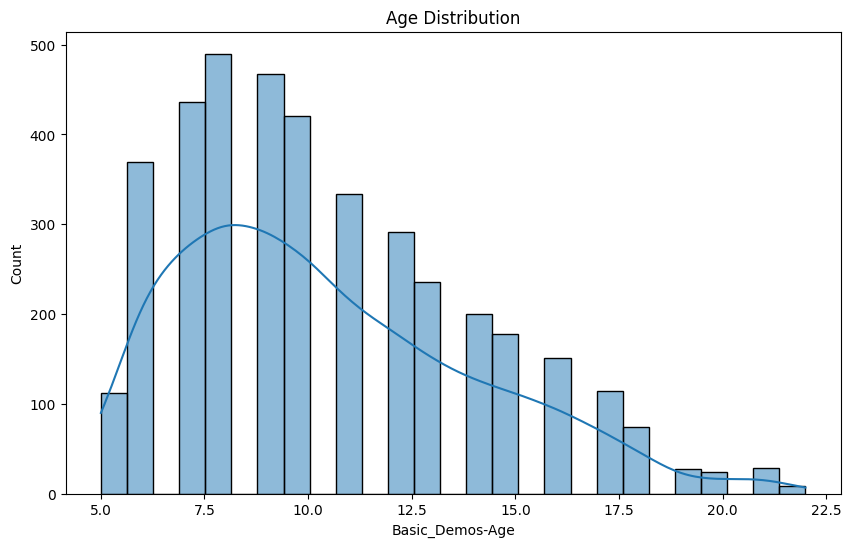

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 生成年龄分布图
plt.figure(figsize=(10, 6))
sns.histplot(df['Basic_Demos-Age'], kde=True)
plt.title("Age Distribution")
plt.show()


In [17]:
# 假設 'id' 欄位包含字串數據，將其從 X 中移除
X = df.drop(['Physical-BMI', 'id'], axis=1)  # 刪除非數值欄位和目標變數欄位
X = pd.get_dummies(X, drop_first=True)  # 轉換類別型變量為數值

# 定義目標變數
y = df['Physical-BMI']



In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 檢查目標變數中的缺失值
print("y 中的缺失值數量:", y.isnull().sum())

# 處理缺失值；例如可以用 y 的均值填充
y.fillna(y.mean(), inplace=True)

# 繼續划分數據集和訓練模型
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建模型實例並訓練
model = LinearRegression()
model.fit(X_train, y_train)

# 預測和評估模型
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y 中的缺失值數量: 938
Mean Squared Error: 5.755370469896297
R^2 Score: 0.7404834763538646


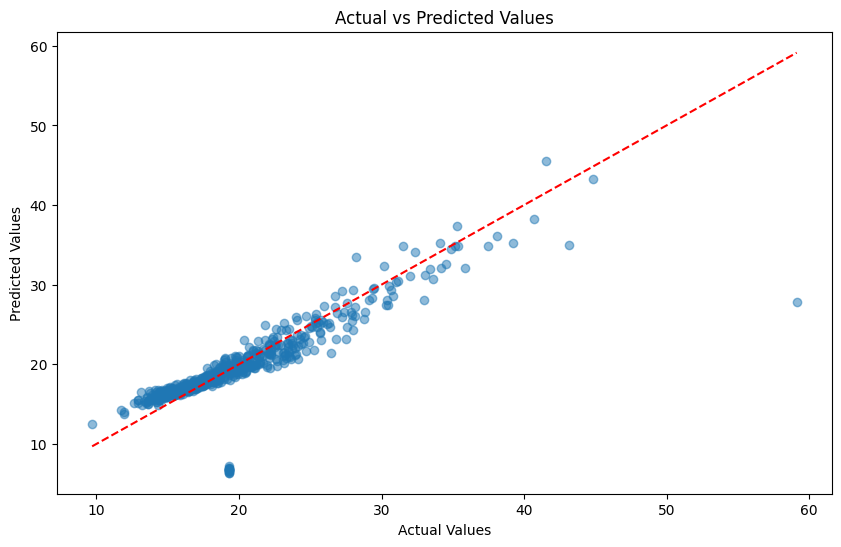

In [20]:
import matplotlib.pyplot as plt

# 繪製真實值和預測值的散點圖
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 添加 y=x 的參考線
plt.show()


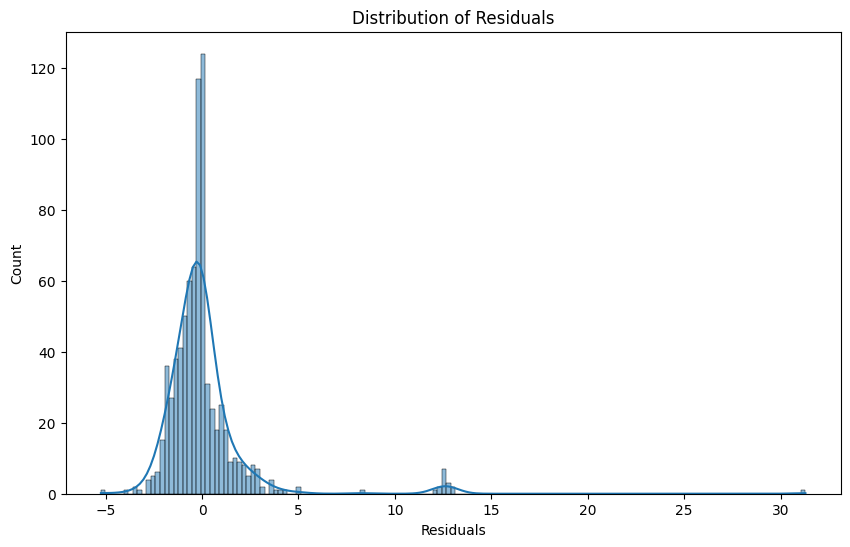

In [21]:
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


In [22]:
# 查看特徵的權重（線性模型係數）
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                                   Feature  Importance
11                  Physical-Season_Spring    0.275309
10        Basic_Demos-Enroll_Season_Winter    0.272763
12                  Physical-Season_Summer    0.174474
18              PreInt_EduHx-Season_Summer    0.165955
3                          Physical-Weight    0.142237
8         Basic_Demos-Enroll_Season_Spring    0.122167
7   PreInt_EduHx-computerinternet_hoursday    0.114970
1                          Basic_Demos-Sex    0.075403
19              PreInt_EduHx-Season_Winter    0.038162
17              PreInt_EduHx-Season_Spring    0.029800
16                       FGC-Season_Winter    0.012238
6                     Physical-Systolic_BP    0.011731
0                          Basic_Demos-Age    0.004199
5                       Physical-HeartRate    0.002645
4                    Physical-Diastolic_BP   -0.001002
14                       FGC-Season_Spring   -0.080926
13                  Physical-Season_Winter   -0.092071
15        

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R^2 Score:", r2_rf)


Random Forest Mean Squared Error: 1.5059564291834546
Random Forest R^2 Score: 0.9320946272167117


In [24]:
from sklearn.model_selection import cross_val_score

# 進行5折交叉驗證
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", scores)
print("Average Cross-Validation R^2 Score:", scores.mean())


Cross-Validation R^2 Scores: [0.77930782 0.81797813 0.83923181 0.80487067 0.70825295]
Average Cross-Validation R^2 Score: 0.7899282756825917


In [29]:
# 特徵係數
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                                        Coefficient
Basic_Demos-Age                            0.004199
Basic_Demos-Sex                            0.075403
Physical-Height                           -0.367543
Physical-Weight                            0.142237
Physical-Diastolic_BP                     -0.001002
Physical-HeartRate                         0.002645
Physical-Systolic_BP                       0.011731
PreInt_EduHx-computerinternet_hoursday     0.114970
Basic_Demos-Enroll_Season_Spring           0.122167
Basic_Demos-Enroll_Season_Summer          -0.118484
Basic_Demos-Enroll_Season_Winter           0.272763
Physical-Season_Spring                     0.275309
Physical-Season_Summer                     0.174474
Physical-Season_Winter                    -0.092071
FGC-Season_Spring                         -0.080926
FGC-Season_Summer                         -0.094057
FGC-Season_Winter                          0.012238
PreInt_EduHx-Season_Spring                 0.029800
PreInt_EduHx

In [30]:
from sklearn.linear_model import Ridge, Lasso

# 使用 Ridge 回歸
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 使用 Lasso 回歸
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores)
print("Mean R^2 score:", scores.mean())


Cross-validated R^2 scores: [0.77930782 0.81797813 0.83923181 0.80487067 0.70825295]
Mean R^2 score: 0.7899282756825917


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 初始化 KNN 模型，設定 K 值（如：5）
knn_model = KNeighborsRegressor(n_neighbors=5)

# 訓練 KNN 模型
knn_model.fit(X_train, y_train)

# 使用測試集進行預測
y_pred_knn = knn_model.predict(X_test)

# 評估模型
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Mean Squared Error:", mse_knn)
print("KNN R^2 Score:", r2_knn)


KNN Mean Squared Error: 4.018665428734716
KNN R^2 Score: 0.8187935794546808
